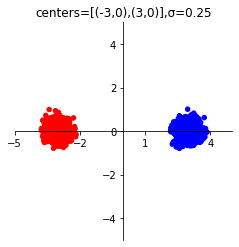

In [4]:
import matplotlib.pyplot as plt 
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import pandas as pd
cols=['iteration','C','Margin']
lst=[]
for i in range (1,2):
    (X, y) = make_blobs(n_samples=4000, n_features=2, centers=[(-3,0),(3,0)],cluster_std=0.25, random_state=i)
    y = np.where(y == 1, 1, -1)
    σ=0.25
    i=i
    import matplotlib.pyplot as plt
    fig,ax=plt.subplots()
    xmin,xmax=-5,5
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([xmin,xmax])

    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    #make the box square shape
    ax.set_aspect('equal')

    ax.scatter(X[:, 0], X[:, 1], marker="o", s=20,color=["r" if y == -1 else "b" for y in y])
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, 3.0))
    plt.title("centers=[(-3,0),(3,0)],σ=%.2f"%(σ))
    #plt.title("Cluster Centers=[(-4,0),(4,0)],σ=%.2f"%σ) 
    #plt.title("centers=[(-3,0),(3,0)]")

Text(0.5, 1.0, 'Cluster Centers=[(-3,0),(3,0)],σ=0.25')

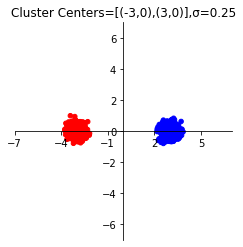

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
j=1
fig,ax=plt.subplots()
xmin,xmax=-7.0,7.0
ax.set_xlim([xmin,xmax])
ax.set_ylim([xmin,xmax])

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#make the box square shape
ax.set_aspect('equal')

ax.scatter(X_train[:, 0], X_train[:, 1], marker="o", s=20,color=["r" if y_train == -1 else "b" for y_train in y_train])
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 3.0))
plt.title("Cluster Centers=[(-3,0),(3,0)],σ=%.2f"%σ)    

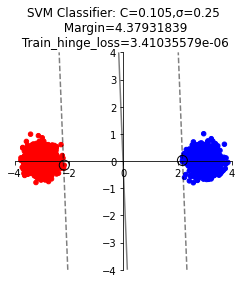

Margin= 4.3793183927


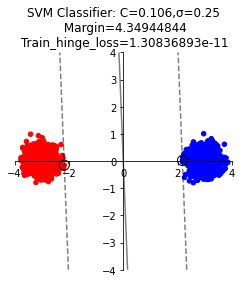

Margin= 4.3494484388


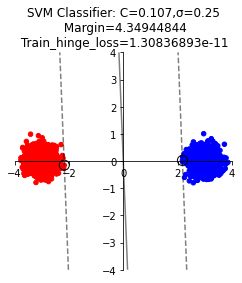

Margin= 4.3494484388


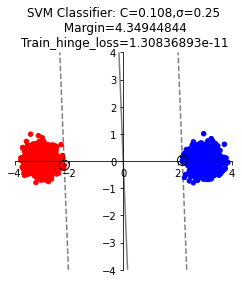

Margin= 4.3494484388


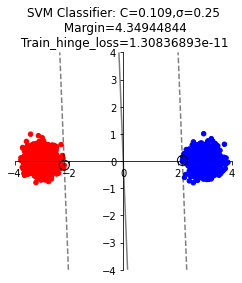

Margin= 4.3494484388
C
[0.105 0.106 0.107 0.108 0.109]


In [12]:
from sklearn import metrics
from sklearn import svm
import numpy as np
from sklearn.metrics import hinge_loss
Cs=np.arange(0.105,0.109,0.001).tolist()
Cs=np.array(Cs)
clf = svm.SVC(kernel='linear', C=Cs)

for C in Cs:
        
    clf.set_params(C=C)
    #clf.fit(X_train, y_train)
    clf.fit(X,y)   
        
    w = clf.coef_[0]
    #Weights.append(w)
        
    alpha=clf.dual_coef_
    
    #ξ=y_train*clf.decision_function(X_train)
    #ξs.append(ξ)

    M= 2 / np.sqrt(np.sum(w ** 2))

    pred_decision= clf.decision_function(X)
    hinge_loss_train=hinge_loss(y,pred_decision)
    
    a = -w[0] / w[1]
    
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], marker="o", s=20,color=["r" if y == -1 else "b" for y in y])
    ax.xaxis.set_ticks(np.arange(-7, 7, 3))
# plot the decision function
    ax = plt.gca()
    ax.set_aspect('equal')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
        
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
# create grid to evaluate model
    xx = np.linspace(-4, 4, 8)
    yy = np.linspace(-4, 4, 8)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    yy = a * xx - (clf.intercept_[0]) / w[1]
    yy_down = yy - np.sqrt(1 + a ** 2) * M
    yy_up = yy + np.sqrt(1 + a ** 2) * M

        
# plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    #plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')    
    
    plt.title('SVM Classifier: C=%.3f,σ=%.2f\n Margin=%.8f\n Train_hinge_loss=%.8e'%(C,σ,M,hinge_loss_train))
    plt.show()
    print("Margin= %.10f"%M)
print ("C")
print (Cs)
#print ("Margin")
#print (Margin)      

In [37]:
hinge_loss_train

0.0010454766708419229

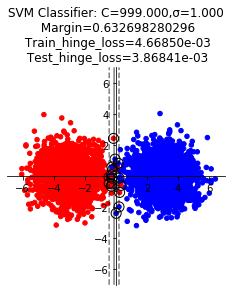

Margin= 0.6326982803


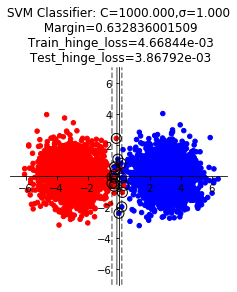

Margin= 0.6328360015
C
[ 999 1000]
Margin
[0.6326982802957054, 0.6328360015088916]
MSE_Train
[0.007142857142857143, 0.007142857142857143]
MSE_Test
[0.006666666666666667, 0.006666666666666667]
number_of_misclassified_train_points
[(array([ 166, 1112, 2103, 2508, 2555], dtype=int64),), (array([ 166, 1112, 2103, 2508, 2555], dtype=int64),)]
number_of_misclassified_test_points
[(array([ 786, 1159], dtype=int64),), (array([ 786, 1159], dtype=int64),)]


In [65]:
from sklearn import metrics
from sklearn import svm
import numpy as np
from sklearn.metrics import hinge_loss
Cs=np.arange(999,1001,1).tolist()
Cs=np.array(Cs)
clf = svm.SVC(kernel='linear', C=Cs)
train_errors = []
test_errors = []
Margin=[]
number_of_misclassified_train_points=[]
number_of_misclassified_test_points=[]
alphas=[]
    #ξs=[]
Train_hinge_loss=[]
cost_training=[]
Test_hinge_loss=[]
cost_testing=[]
    
old_M=0
old_C=0
old_train=0
old_test=0
old_misclassified_train=0
old_misclassified_test=0
old_hinge_loss_train=0
old_hinge_loss_test=0
old_cost_train=0
old_cost_test=0

for C in Cs:
        
    clf.set_params(C=C)
    clf.fit(X_train, y_train)
       
    y_train_predict=clf.predict(X_train)
    misclassified_train=np.where(y_train != clf.predict(X_train))
    number_of_misclassified_train_points.append(misclassified_train)
    train_errors.append(metrics.mean_squared_error(y_train,y_train_predict))
        
    y_test_predict=clf.predict(X_test)
    misclassified_test=np.where(y_test != clf.predict(X_test))
    number_of_misclassified_test_points.append(misclassified_test)
    test_errors.append(metrics.mean_squared_error(y_test,y_test_predict))
        
    w = clf.coef_[0]
    #Weights.append(w)
    
    pred_decision_train = clf.decision_function(X_train)
    hinge_loss_train=hinge_loss(y_train,pred_decision_train)
    Train_hinge_loss.append(hinge_loss_train)
    
    pred_decision_test = clf.decision_function(X_test)
    hinge_loss_test=hinge_loss(y_test,pred_decision_test)
    Test_hinge_loss.append(hinge_loss_test)
        
    alpha=clf.dual_coef_
    alphas.append(alpha)
    #ξ=y_train*clf.decision_function(X_train)
    #ξs.append(ξ)

    M= 2 / np.sqrt(np.sum(w ** 2))
    Margin.append(M) 
    
    a = -w[0] / w[1]
    
    plt.figure()
    #plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", s=20,color=["r" if y_train == -1 else "b" for y_train in y_train])
    plt.scatter(X[:, 0], X[:, 1], marker="o", s=20,color=["r" if y == -1 else "b" for y in y])

    ax.xaxis.set_ticks(np.arange(-7, 7, 3))
# plot the decision function
    ax = plt.gca()
    ax.set_aspect('equal')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
        
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
# create grid to evaluate model
    xx = np.linspace(-7, 7, 14)
    yy = np.linspace(-7, 7, 14)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    yy = a * xx - (clf.intercept_[0]) / w[1]
    yy_down = yy - np.sqrt(1 + a ** 2) * M
    yy_up = yy + np.sqrt(1 + a ** 2) * M

        
# plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    #plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')    
    
    plt.title('SVM Classifier: C=%.3f,σ=%.3f\n Margin=%.12f\n Train_hinge_loss=%.5e\n Test_hinge_loss=%.5e'%(C,σ,M,hinge_loss_train,hinge_loss_test))
    plt.show()
    print("Margin= %.10f"%M)
    

#print ('iteration=%.f'%i)
print ("C")
print (Cs)
print ("Margin")
print (Margin)
print ("MSE_Train")
print (train_errors)
print ("MSE_Test")
print (test_errors)
#print ("ξ")
#print (ξs)
print ("number_of_misclassified_train_points")
print (number_of_misclassified_train_points)
print ("number_of_misclassified_test_points")
print (number_of_misclassified_test_points)    

In [48]:
Test_hinge_loss

[]

In [41]:
from sklearn import metrics
from sklearn import svm
import numpy as np
from sklearn.metrics import hinge_loss
Cs=np.arange(0.050,0.301,0.001).tolist()
Cs=np.array(Cs)
clf = svm.SVC(kernel='linear', C=Cs)
train_errors = []
test_errors = []
cols=['iteration','C','Margin','MSE_Train','Misclass._Train_Points','MSE_Test','Misclass._Test_Points', 'Train_hinge_loss','cost_training','Test_hinge_loss','cost_testing']
lst=[]
Margin=[]
number_of_misclassified_train_points=[]
number_of_misclassified_test_points=[]
alphas=[]
    #ξs=[]
Train_hinge_loss=[]
cost_training=[]
Test_hinge_loss=[]
cost_testing=[]
    
old_M=0
old_C=0
old_train=0
old_test=0
old_misclassified_train=0
old_misclassified_test=0
old_hinge_loss_train=0
old_hinge_loss_test=0
old_cost_train=0
old_cost_test=0

for C in Cs:
        
    clf.set_params(C=C)
    clf.fit(X_train, y_train)
        
        #C.append(C)
    i=i
    w = clf.coef_[0]
    #Weights.append(w)
        
    y_train_predict=clf.predict(X_train)
    train_error=metrics.mean_squared_error(y_train,y_train_predict)
    train_errors.append(train_error)
        
    misclassified_train=np.where(y_train != y_train_predict)
    number_of_misclassified_train_points.append(misclassified_train)
       
        
    y_test_predict=clf.predict(X_test)
    test_error=metrics.mean_squared_error(y_test,y_test_predict)
    test_errors.append(test_error)
        
    misclassified_test=np.where(y_test != y_test_predict)
    number_of_misclassified_test_points.append(misclassified_test)
        
    pred_decision_train = clf.decision_function(X_train)
    hinge_loss_train=hinge_loss(y_train,pred_decision_train)
    Train_hinge_loss.append(hinge_loss_train)

    pred_decision_test = clf.decision_function(X_test)
    hinge_loss_test=hinge_loss(y_test,pred_decision_test)
    Test_hinge_loss.append(hinge_loss_test)
        
    cost_train=1/2* np.dot(w,w)+C* hinge_loss_train
    cost_training.append(cost_train)
        
    cost_test=1/2* np.dot(w,w)+ C*hinge_loss_test
    cost_testing.append(cost_test)
        
    #alpha=clf.dual_coef_
        #alphas.append(alpha)
        #ξ=y_train*clf.decision_function(X_train)
        #ξs.append(ξ)
    a = -w[0] / w[1]
    M= 2 / np.sqrt(np.sum(w ** 2))
    Margin.append(M)
        #if M!=old_M:
            #old_M=M
            #old_C=C
            #old_train=train_error
            #old_test=test_error
            #old_misclassified_train=len(misclassified_train[0])
            #old_misclassified_test=len(misclassified_test[0])
        #else:
            #break
        #lst.append([i,C,Margin,train_errors,number_of_misclassified_train_points,test_errors,number_of_misclassified_test_points,Train_hinge_loss,cost_training,Test_hinge_loss,cost_testing])    
    lst.append([i,C,M,train_error,len(misclassified_train[0]),test_error,len(misclassified_test[0]),hinge_loss_train,cost_train,hinge_loss_test,cost_test])    
 
    #print ('iteration=%.f'%i)
    #print (old_C,old_M)
    
print ("C")
print (Cs)
print ("Margin")
print (Margin)
print ("MSE_Train")
print (train_errors)
print ("MSE_Test")
print (test_errors)
    #print ("ξ")
    #print (ξs)
    #print ("number_of_misclassified_train_points")
    #print (number_of_misclassified_train_points)
    #print ("number_of_misclassified_test_points")
    #print (number_of_misclassified_test_points)
df = pd.DataFrame(lst, columns=cols)

C
[0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059 0.06  0.061
 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071 0.072 0.073
 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083 0.084 0.085
 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095 0.096 0.097
 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106 0.107 0.108 0.109
 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118 0.119 0.12  0.121
 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.129 0.13  0.131 0.132 0.133
 0.134 0.135 0.136 0.137 0.138 0.139 0.14  0.141 0.142 0.143 0.144 0.145
 0.146 0.147 0.148 0.149 0.15  0.151 0.152 0.153 0.154 0.155 0.156 0.157
 0.158 0.159 0.16  0.161 0.162 0.163 0.164 0.165 0.166 0.167 0.168 0.169
 0.17  0.171 0.172 0.173 0.174 0.175 0.176 0.177 0.178 0.179 0.18  0.181
 0.182 0.183 0.184 0.185 0.186 0.187 0.188 0.189 0.19  0.191 0.192 0.193
 0.194 0.195 0.196 0.197 0.198 0.199 0.2   0.201 0.202 0.203 0.204 0.205
 0.206 0.207 0.208 0.209 0.21  0.211 0.212 0.213 

In [42]:
df.to_excel (r'C:\Users\i49ahmed\Downloads\FinalTest\FinalTest_0.25_ConferencePaper.xlsx', index = False, header=True)

In [22]:
C=[0.06 , 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068,
       0.069, 0.07 , 0.071, 0.072, 0.073, 0.074, 0.075, 0.076, 0.077,
       0.078, 0.079, 0.08 , 0.081, 0.082, 0.083, 0.084, 0.085, 0.086,
       0.087, 0.088, 0.089, 0.09 , 0.091, 0.092, 0.093, 0.094, 0.095,
       0.096, 0.097, 0.098, 0.099, 0.1  , 0.101, 0.102, 0.103, 0.104,
       0.105, 0.106, 0.107, 0.108, 0.109, 0.11 , 0.111, 0.112, 0.113,
       0.114, 0.115, 0.116, 0.117, 0.118, 0.119, 0.12 , 0.121, 0.122,
       0.123, 0.124, 0.125, 0.126, 0.127, 0.128, 0.129, 0.13 , 0.131,
       0.132, 0.133, 0.134, 0.135, 0.136, 0.137, 0.138, 0.139, 0.14 ,
       0.141, 0.142, 0.143, 0.144, 0.145, 0.146, 0.147, 0.148, 0.149,
       0.15 , 0.151, 0.152, 0.153, 0.154, 0.155, 0.156, 0.157, 0.158,
       0.159, 0.16 , 0.161, 0.162, 0.163, 0.164, 0.165, 0.166, 0.167,
       0.168, 0.169, 0.17 , 0.171, 0.172, 0.173, 0.174, 0.175, 0.176,
       0.177, 0.178, 0.179, 0.18 , 0.181, 0.182, 0.183, 0.184, 0.185,
       0.186, 0.187, 0.188, 0.189, 0.19 , 0.191, 0.192, 0.193, 0.194,
       0.195, 0.196, 0.197, 0.198, 0.199, 0.2  , 0.201, 0.202, 0.203,
       0.204, 0.205, 0.206, 0.207, 0.208, 0.209, 0.21 , 0.211, 0.212,
       0.213, 0.214, 0.215, 0.216, 0.217, 0.218, 0.219, 0.22 , 0.221,
       0.222, 0.223, 0.224, 0.225, 0.226, 0.227, 0.228, 0.229, 0.23 ]
C

[0.06,
 0.061,
 0.062,
 0.063,
 0.064,
 0.065,
 0.066,
 0.067,
 0.068,
 0.069,
 0.07,
 0.071,
 0.072,
 0.073,
 0.074,
 0.075,
 0.076,
 0.077,
 0.078,
 0.079,
 0.08,
 0.081,
 0.082,
 0.083,
 0.084,
 0.085,
 0.086,
 0.087,
 0.088,
 0.089,
 0.09,
 0.091,
 0.092,
 0.093,
 0.094,
 0.095,
 0.096,
 0.097,
 0.098,
 0.099,
 0.1,
 0.101,
 0.102,
 0.103,
 0.104,
 0.105,
 0.106,
 0.107,
 0.108,
 0.109,
 0.11,
 0.111,
 0.112,
 0.113,
 0.114,
 0.115,
 0.116,
 0.117,
 0.118,
 0.119,
 0.12,
 0.121,
 0.122,
 0.123,
 0.124,
 0.125,
 0.126,
 0.127,
 0.128,
 0.129,
 0.13,
 0.131,
 0.132,
 0.133,
 0.134,
 0.135,
 0.136,
 0.137,
 0.138,
 0.139,
 0.14,
 0.141,
 0.142,
 0.143,
 0.144,
 0.145,
 0.146,
 0.147,
 0.148,
 0.149,
 0.15,
 0.151,
 0.152,
 0.153,
 0.154,
 0.155,
 0.156,
 0.157,
 0.158,
 0.159,
 0.16,
 0.161,
 0.162,
 0.163,
 0.164,
 0.165,
 0.166,
 0.167,
 0.168,
 0.169,
 0.17,
 0.171,
 0.172,
 0.173,
 0.174,
 0.175,
 0.176,
 0.177,
 0.178,
 0.179,
 0.18,
 0.181,
 0.182,
 0.183,
 0.184,
 0.185,
 0.186

In [9]:
t=[5.498247719001791e-06, 5.497111311797024e-06, 5.495974904592376e-06, 5.4948384973876485e-06, 5.493702090182882e-06, 5.4925656829782345e-06, 5.491429275773507e-06, 5.490292868568741e-06, 5.4891564613640135e-06, 5.488020054159366e-06, 5.486883646954718e-06, 5.485747239749872e-06, 5.484610832545224e-06, 5.483474425340537e-06, 5.48233801813577e-06, 5.481201610931162e-06, 5.4800652037264344e-06, 5.478928796521708e-06, 5.47779238931702e-06, 5.476655982112253e-06, 5.475519574907645e-06, 5.474383167702879e-06, 5.473246760498112e-06, 5.472110353293424e-06, 5.470973946088737e-06, 5.4698375388839705e-06, 5.468701131679283e-06, 5.4675647244745954e-06, 5.466428317269829e-06, 5.465291910065142e-06, 5.464155502860414e-06, 5.4630190956557665e-06, 5.461882688451e-06, 5.460746281246233e-06, 5.459609874041625e-06, 5.458473466836858e-06, 5.4573370596321704e-06, 5.456200652427484e-06, 5.455064245222756e-06, 5.453927838018069e-06, 5.4527914308133415e-06, 5.451655023608575e-06, 5.450518616403808e-06, 5.4493822091992e-06, 5.448245801994513e-06, 4.871936840769111e-06, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11, 1.8808408719372948e-11]
t

[5.498247719001791e-06,
 5.497111311797024e-06,
 5.495974904592376e-06,
 5.4948384973876485e-06,
 5.493702090182882e-06,
 5.4925656829782345e-06,
 5.491429275773507e-06,
 5.490292868568741e-06,
 5.4891564613640135e-06,
 5.488020054159366e-06,
 5.486883646954718e-06,
 5.485747239749872e-06,
 5.484610832545224e-06,
 5.483474425340537e-06,
 5.48233801813577e-06,
 5.481201610931162e-06,
 5.4800652037264344e-06,
 5.478928796521708e-06,
 5.47779238931702e-06,
 5.476655982112253e-06,
 5.475519574907645e-06,
 5.474383167702879e-06,
 5.473246760498112e-06,
 5.472110353293424e-06,
 5.470973946088737e-06,
 5.4698375388839705e-06,
 5.468701131679283e-06,
 5.4675647244745954e-06,
 5.466428317269829e-06,
 5.465291910065142e-06,
 5.464155502860414e-06,
 5.4630190956557665e-06,
 5.461882688451e-06,
 5.460746281246233e-06,
 5.459609874041625e-06,
 5.458473466836858e-06,
 5.4573370596321704e-06,
 5.456200652427484e-06,
 5.455064245222756e-06,
 5.453927838018069e-06,
 5.4527914308133415e-06,
 5.451655023

In [10]:
t=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
t

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [31]:
from sklearn import metrics
from sklearn import svm
import numpy as np
from sklearn.metrics import hinge_loss
Cs=np.arange(0.050,0.301,0.001).tolist()
Cs=np.array(Cs)
clf = svm.SVC(kernel='linear', C=Cs)
train_errors = []
test_errors = []
Margin=[]
number_of_misclassified_train_points=[]
number_of_misclassified_test_points=[]
alphas=[]
    #ξs=[]
Train_hinge_loss=[]
cost_training=[]
Test_hinge_loss=[]
cost_testing=[]
    
old_M=0
old_C=0
old_train=0
old_test=0
old_misclassified_train=0
old_misclassified_test=0
old_hinge_loss_train=0
old_hinge_loss_test=0
old_cost_train=0
old_cost_test=0

for C in Cs:
        
    clf.set_params(C=C)
    clf.fit(X_train, y_train)
        
    y_train_predict=clf.predict(X_train)
    misclassified_train=np.where(y_train != clf.predict(X_train))
    number_of_misclassified_train_points.append(misclassified_train)
    train_errors.append(metrics.mean_squared_error(y_train,y_train_predict))
        
    y_test_predict=clf.predict(X_test)
    misclassified_test=np.where(y_test != clf.predict(X_test))
    number_of_misclassified_test_points.append(misclassified_test)
    test_errors.append(metrics.mean_squared_error(y_test,y_test_predict))
        
    w = clf.coef_[0]
    #Weights.append(w)
    
    pred_decision_train = clf.decision_function(X_train)
    hinge_loss_train=hinge_loss(y_train,pred_decision_train)
    Train_hinge_loss.append(hinge_loss_train)
        
    alpha=clf.dual_coef_
    alphas.append(alpha)
    #ξ=y_train*clf.decision_function(X_train)
    #ξs.append(ξ)

    M= 2 / np.sqrt(np.sum(w ** 2))
    Margin.append(M) 
    
    a = -w[0] / w[1]

In [32]:
Cs=Cs.tolist()
Cs

[0.05,
 0.051000000000000004,
 0.052000000000000005,
 0.053000000000000005,
 0.054000000000000006,
 0.05500000000000001,
 0.05600000000000001,
 0.05700000000000001,
 0.05800000000000001,
 0.05900000000000001,
 0.06000000000000001,
 0.06100000000000001,
 0.06200000000000001,
 0.06300000000000001,
 0.06400000000000002,
 0.06500000000000002,
 0.06600000000000002,
 0.06700000000000002,
 0.06800000000000002,
 0.06900000000000002,
 0.07000000000000002,
 0.07100000000000002,
 0.07200000000000002,
 0.07300000000000002,
 0.07400000000000002,
 0.07500000000000002,
 0.07600000000000003,
 0.07700000000000003,
 0.07800000000000003,
 0.07900000000000003,
 0.08000000000000003,
 0.08100000000000003,
 0.08200000000000003,
 0.08300000000000003,
 0.08400000000000003,
 0.08500000000000003,
 0.08600000000000003,
 0.08700000000000004,
 0.08800000000000004,
 0.08900000000000004,
 0.09000000000000004,
 0.09100000000000004,
 0.09200000000000004,
 0.09300000000000004,
 0.09400000000000004,
 0.09500000000000004,

In [33]:
Train_hinge_loss

[2.7105579347405413e-05,
 2.6510320772202954e-05,
 1.237630757627478e-05,
 5.506202569434801e-06,
 5.505066162229994e-06,
 5.503929755025386e-06,
 5.50279334782058e-06,
 5.501656940615813e-06,
 5.500520533411205e-06,
 5.4993841262064774e-06,
 5.498247719001791e-06,
 5.497111311797024e-06,
 5.495974904592336e-06,
 5.4948384973876485e-06,
 5.493702090182922e-06,
 5.492565682978274e-06,
 5.491429275773467e-06,
 5.490292868568741e-06,
 5.489156461364053e-06,
 5.488020054159366e-06,
 5.4868836469546384e-06,
 5.485747239749991e-06,
 5.484610832545303e-06,
 5.483474425340537e-06,
 5.482338018135889e-06,
 5.481201610931162e-06,
 5.480065203726356e-06,
 5.478928796521668e-06,
 5.477792389316862e-06,
 5.476655982112253e-06,
 5.475519574907527e-06,
 5.474383167702799e-06,
 5.473246760498112e-06,
 5.4721103532933845e-06,
 5.470973946088737e-06,
 5.46983753888405e-06,
 5.468701131679283e-06,
 5.4675647244745954e-06,
 5.466428317269829e-06,
 5.465291910065142e-06,
 5.4641555028603744e-06,
 5.4630190

In [34]:
Test_hinge_loss

[]